# **APPLY AI FINAL PROJECT - Appraise Your Car Quickly**

In [1]:
# imports
# Follow python style guidelines (pep-8) on the order of imports (https://pep8.org/#imports)

import os
import warnings
import zipfile
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
# List data files
os.listdir("/home/data")

['skoda.csv',
 'focus.csv',
 'vw.csv',
 'vauxhall.csv',
 'bmw.csv',
 'merc.csv',
 'hyundi.csv',
 'toyota.csv',
 'unclean cclass.csv',
 'cclass.csv',
 'audi.csv',
 'unclean focus.csv',
 'ford.csv']

In [3]:
# load individual data files into a single dataframe, adding the brand as a column

data = []
for filename in os.listdir("data"):
    df = pd.read_csv(f"/home/data/{filename}")
    df["brand"] = filename.split(".csv")[0]
    data.append(df)

df = pd.concat(data)
df.reset_index(inplace=True, drop=True)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Octavia,2017.0,10550,Manual,25250,Petrol,150.0,54.3,1.4,skoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Citigo,2018.0,8200,Manual,1264,Petrol,145.0,67.3,1.0,skoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Octavia,2019.0,15650,Automatic,6825,Diesel,145.0,67.3,2.0,skoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yeti Outdoor,2015.0,14000,Automatic,28431,Diesel,165.0,51.4,2.0,skoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Superb,2019.0,18350,Manual,10912,Petrol,150.0,40.9,1.5,skoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
118145,Fiesta,2016.0,7999,Manual,31348,Petrol,125.0,54.3,1.2,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118146,B-MAX,2017.0,8999,Manual,16700,Petrol,150.0,47.1,1.4,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118147,B-MAX,2014.0,7499,Manual,40700,Petrol,30.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118148,Focus,2015.0,9999,Manual,7010,Diesel,20.0,67.3,1.6,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118149,KA,2018.0,8299,Manual,5007,Petrol,145.0,57.7,1.2,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(118150, 17)

In [7]:
df.describe()

,year,tax,mpg,engineSize,tax(£)
count,117903.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.106452,120.256183,55.166825,1.661644,121.147119
std,2.135852,63.404805,16.138522,0.557058,58.003289
min,1970.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,580.000000,470.800000,6.600000,555.000000


In [8]:
df.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuelType         object
tax             float64
mpg             float64
engineSize      float64
brand            object
tax(£)          float64
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [9]:
# Null values

df.isna().sum()

model              155
year               247
price              155
transmission       155
mileage           1073
fuelType          9610
tax              23823
mpg              18963
engineSize        9610
brand                0
tax(£)          113290
fuel type       114633
engine size     108805
mileage2        108751
fuel type2      109613
engine size2    109613
reference       108695
dtype: int64

<AxesSubplot:>

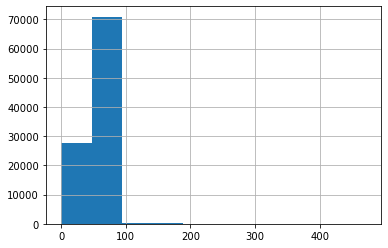

In [10]:
df.mpg.hist()

<AxesSubplot:>

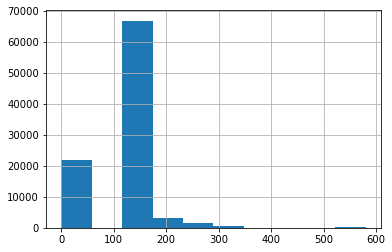

In [11]:
df.tax.hist()

<AxesSubplot:>

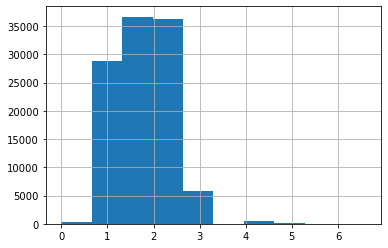

In [12]:
df.engineSize.hist()

<AxesSubplot:>

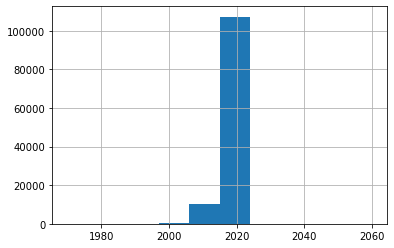

In [13]:
df.year.hist()

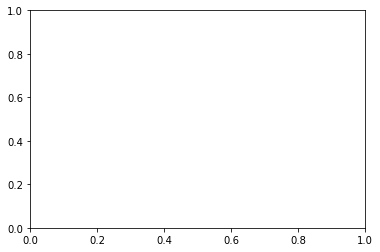

TypeError: '<=' not supported between instances of 'int' and 'str'

In [14]:
df.price.hist()

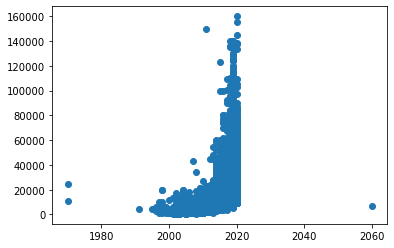

In [53]:
plt.scatter(df.sort_values(by="year").year, df.sort_values(by="year").price)

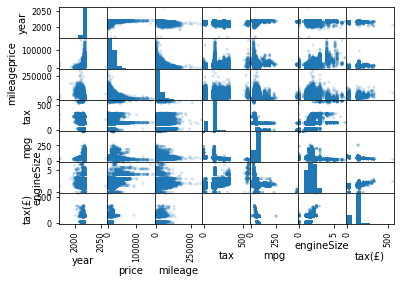

<Figure size 720x720 with 0 Axes>

In [54]:
pd.plotting.scatter_matrix(df, alpha=0.2)
plt.figure(figsize=(10,10))
plt.show()

<AxesSubplot:>

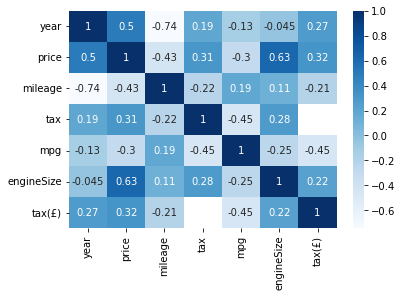

In [55]:

corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

**Data Exploration:**  
1 - data types  
2 - data distribution  
3 - null values and data imputation  
4 - outliers  
5 - normalization  
6 - correlation (with dependent and independent variables)  
7 - encode any categorical data to be used


In [58]:
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,GT86,2016,16000,Manual,24089,Petrol,265.0,36.2,2.0,toyota,NaN
1,GT86,2017,15995,Manual,18615,Petrol,145.0,36.2,2.0,toyota,NaN
2,GT86,2015,13998,Manual,27469,Petrol,265.0,36.2,2.0,toyota,NaN
3,GT86,2017,18998,Manual,14736,Petrol,150.0,36.2,2.0,toyota,NaN
4,GT86,2017,17498,Manual,36284,Petrol,145.0,36.2,2.0,toyota,NaN


In [59]:
df = df[(df.year >= 2010) & (df.year <= 2020)]

In [60]:
df.year.value_counts()

2019    29955
2017    23686
2016    16948
2018    15092
2015     8359
2020     4657
2014     4377
2013     2818
2012      702
2011      477
2010      369
Name: year, dtype: int64

In [61]:
df.shape

(107440, 11)

In [62]:
outlier_indices = []
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
iqr = q3 - q1 
outlier_find = iqr * 1.5
outlier_list = df[(df.price < q1 - outlier_find) | (df.price > q3 + outlier_find)].index

In [63]:
df = df.drop(outlier_list)

In [64]:
df.shape

(103341, 11)

In [67]:
df["age"] = 2020 - df.year

In [68]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£),age
0,GT86,2016,16000,Manual,24089,Petrol,265.0,36.2,2.0,toyota,NaN,4
1,GT86,2017,15995,Manual,18615,Petrol,145.0,36.2,2.0,toyota,NaN,3
2,GT86,2015,13998,Manual,27469,Petrol,265.0,36.2,2.0,toyota,NaN,5
3,GT86,2017,18998,Manual,14736,Petrol,150.0,36.2,2.0,toyota,NaN,3
4,GT86,2017,17498,Manual,36284,Petrol,145.0,36.2,2.0,toyota,NaN,3


In [69]:
df=df[["model", "age", "transmission", "fuelType", "engineSize", "price"]]

In [70]:
df.head()

,model,age,transmission,fuelType,engineSize,price
0,GT86,4,Manual,Petrol,2.0,16000
1,GT86,3,Manual,Petrol,2.0,15995
2,GT86,5,Manual,Petrol,2.0,13998
3,GT86,3,Manual,Petrol,2.0,18998
4,GT86,3,Manual,Petrol,2.0,17498


In [71]:
transmission = pd.get_dummies(df.transmission)

In [73]:
# transmission = transmission[["Automatic, Manual"]]


In [74]:
transmission.value_counts()

Automatic  Manual  Other  Semi-Auto
0          1       0      0            60549
           0       0      1            22491
1          0       0      0            20291
0          0       1      0               10
dtype: int64

In [75]:
df = df.merge(transmission, right_on=transmission.index, left_on=df.index)

In [76]:
df.head()

,key_0,model,age,transmission,fuelType,engineSize,price,Automatic,Manual,Other,Semi-Auto
0,0,GT86,4,Manual,Petrol,2.0,16000,0,1,0,0
1,1,GT86,3,Manual,Petrol,2.0,15995,0,1,0,0
2,2,GT86,5,Manual,Petrol,2.0,13998,0,1,0,0
3,3,GT86,3,Manual,Petrol,2.0,18998,0,1,0,0
4,4,GT86,3,Manual,Petrol,2.0,17498,0,1,0,0


In [77]:
df = df[['model', 'age', 'transmission', 'fuelType', 'engineSize', 'price', 'Automatic', 'Manual', 'Other', 'Semi-Auto']]

In [78]:
df.columns

Index(['model', 'age', 'transmission', 'fuelType', 'engineSize', 'price',
       'Automatic', 'Manual', 'Other', 'Semi-Auto'],
      dtype='object')

In [79]:
df = df[df.Other != 1]

In [80]:
df = df[['model', 'age', 'transmission', 'fuelType', 'engineSize', 'price', 'Automatic', 'Manual', 'Semi-Auto']]

In [81]:
df.head()

,model,age,transmission,fuelType,engineSize,price,Automatic,Manual,Semi-Auto
0,GT86,4,Manual,Petrol,2.0,16000,0,1,0
1,GT86,3,Manual,Petrol,2.0,15995,0,1,0
2,GT86,5,Manual,Petrol,2.0,13998,0,1,0
3,GT86,3,Manual,Petrol,2.0,18998,0,1,0
4,GT86,3,Manual,Petrol,2.0,17498,0,1,0


In [82]:
fuelType = pd.get_dummies(df.fuelType)

In [83]:
fuelType

,Diesel,Electric,Hybrid,Other,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
103336,0,0,0,0,1
103337,0,0,0,0,1
103338,0,0,0,0,1
103339,0,0,0,0,1


In [84]:
fuelType.value_counts()

Diesel  Electric  Hybrid  Other  Petrol
0       0         0       0      1         57520
1       0         0       0      0         42425
0       0         1       0      0          3136
                  0       1      0           244
        1         0       0      0             6
dtype: int64

In [85]:
df = df.merge(fuelType, right_on=fuelType.index, left_on=df.index)

In [86]:
df

,key_0,model,age,transmission,fuelType,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,0,GT86,4,Manual,Petrol,2.0,16000,0,1,0,0,0,0,0,1
1,1,GT86,3,Manual,Petrol,2.0,15995,0,1,0,0,0,0,0,1
2,2,GT86,5,Manual,Petrol,2.0,13998,0,1,0,0,0,0,0,1
3,3,GT86,3,Manual,Petrol,2.0,18998,0,1,0,0,0,0,0,1
4,4,GT86,3,Manual,Petrol,2.0,17498,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103326,103336,Agila,6,Manual,Petrol,1.2,4995,0,1,0,0,0,0,0,1
103327,103337,Agila,9,Manual,Petrol,1.2,4655,0,1,0,0,0,0,0,1
103328,103338,Agila,7,Automatic,Petrol,1.2,5490,1,0,0,0,0,0,0,1
103329,103339,Agila,6,Automatic,Petrol,1.2,7250,1,0,0,0,0,0,0,1


In [87]:
df = df[df.Electric != 1]
df = df[df.Other != 1]
df = df[df.Hybrid != 1]

In [88]:
df.columns

Index(['key_0', 'model', 'age', 'transmission', 'fuelType', 'engineSize',
       'price', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel', 'Electric',
       'Hybrid', 'Other', 'Petrol'],
      dtype='object')

In [89]:
df = df[['model', 'age', 'engineSize',
       'price', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
        'Petrol']]

In [90]:
df.head()

,model,age,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,GT86,4,2.0,16000,0,1,0,0,1
1,GT86,3,2.0,15995,0,1,0,0,1
2,GT86,5,2.0,13998,0,1,0,0,1
3,GT86,3,2.0,18998,0,1,0,0,1
4,GT86,3,2.0,17498,0,1,0,0,1


In [91]:
df.to_csv("data_clean_lc.csv", compression="gzip")

In [92]:
df.model.value_counts()

 Focus      9877
 C Class    6851
 Fiesta     6486
 Golf       4708
 Corsa      3396
            ... 
 RS7           1
220            1
 R Class       1
180            1
 Ranger        1
Name: model, Length: 168, dtype: int64

In [93]:
#######

In [94]:
data = df[['age', 'engineSize',
       'price', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
        'Petrol']]

In [96]:
data.head()

,age,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,4,2.0,16000,0,1,0,0,1
1,3,2.0,15995,0,1,0,0,1
2,5,2.0,13998,0,1,0,0,1
3,3,2.0,18998,0,1,0,0,1
4,3,2.0,17498,0,1,0,0,1


In [97]:
X = data[['age', 'engineSize',
        'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
        'Petrol']]

In [98]:
y = data["price"]

**Baseline model. Predict price based on price average by car age**

In [100]:
age_base_prediction = df.groupby("age").mean()

In [101]:
age_base_prediction = age_base_prediction["price"]

In [102]:
age_base_prediction

age
0     23800.058239
1     21114.948417
2     15477.629908
3     14039.964181
4     13110.853662
5     11476.681418
6      9851.019645
7      8429.079869
8      7448.929496
9      6447.544681
10     5187.675824
Name: price, dtype: float64

In [103]:
baseline = df.copy()

In [104]:
baseline.head()

,model,age,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,GT86,4,2.0,16000,0,1,0,0,1
1,GT86,3,2.0,15995,0,1,0,0,1
2,GT86,5,2.0,13998,0,1,0,0,1
3,GT86,3,2.0,18998,0,1,0,0,1
4,GT86,3,2.0,17498,0,1,0,0,1


In [106]:
baseline = baseline.merge(age_base_prediction, left_on=df.age, right_on=age_base_prediction.index)

In [107]:
baseline

,key_0,model,age,engineSize,price_x,Automatic,Manual,Semi-Auto,Diesel,Petrol,price_y
0,4,GT86,4,2.0,16000,0,1,0,0,1,13110.853662
1,4,GT86,4,2.0,13990,0,1,0,0,1,13110.853662
2,4,GT86,4,2.0,15995,0,0,1,0,1,13110.853662
3,4,GT86,4,2.0,15000,0,1,0,0,1,13110.853662
4,4,GT86,4,2.0,17500,0,1,0,0,1,13110.853662
...,...,...,...,...,...,...,...,...,...,...,...
99940,9,Insignia,9,2.0,3000,0,1,0,1,0,6447.544681
99941,9,Insignia,9,2.0,4473,1,0,0,1,0,6447.544681
99942,9,Agila,9,1.2,5499,1,0,0,0,1,6447.544681
99943,9,Agila,9,1.2,3699,0,1,0,0,1,6447.544681


**performance metric of baseline model**

In [109]:
r2_score(baseline.price_x, baseline.price_y)

0.3452811931304316

In [115]:
df.columns

Index(['model', 'age', 'engineSize', 'price', 'Automatic', 'Manual',
       'Semi-Auto', 'Diesel', 'Petrol'],
      dtype='object')

In [116]:
df = df [['age', 'engineSize', 'price', 'Automatic', 'Manual',
       'Semi-Auto', 'Diesel', 'Petrol']]

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [118]:
X.shape, y.shape

((99945, 7), (99945,))

In [119]:
# Split the dataset into training and test (validation) datasets

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79956, 7), (19989, 7), (79956,), (19989,))

**Linear regression**

In [124]:
reg = LinearRegression().fit(X_train, y_train)

In [125]:
# Make predictions on the test dataset and calculate performance metric (r squared) 

In [126]:
y_hat = reg.predict(X_test)

In [127]:
r2_score(y_test.values, y_hat)

0.7378611877510337

In [128]:
reg.coef_

array([-2199.03695559,  6987.71138347,   986.67978649, -2802.0881786 ,
        1815.40839211,  -229.1379093 ,   229.1379093 ])

In [129]:
reg.intercept_

11862.319711641572

In [130]:
X_train.columns

Index(['age', 'engineSize', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
       'Petrol'],
      dtype='object')

**Regularized regression (L1 (lasso) and L2 (ridge))**

In [132]:
from sklearn.linear_model import Ridge, Lasso

In [133]:
reg_lasso = Lasso().fit(X_train, y_train)
reg_ridge = Ridge().fit(X_train, y_train)

In [134]:
y_hat_ridge = reg_ridge.predict(X_test)
y_hat_lasso = reg_lasso.predict(X_test)

In [135]:
r2_score(y_test.values, y_hat_ridge)

0.7378613183114618

In [136]:
r2_score(y_test.values, y_hat_lasso)

0.737857861177388

In [144]:
sorted(list((zip(X_train.columns, reg_lasso.coef_))), key=lambda x: x[1])

[('Manual', -3788.479643508591),
 ('age', -2198.9780847842776),
 ('Diesel', -448.6906939961141),
 ('Automatic', 0.0),
 ('Petrol', 2.6041436331670772e-12),
 ('Semi-Auto', 824.5914817005815),
 ('engineSize', 6979.230820447398)]

In [145]:
reg_ridge.predict(X_test)

array([18408.35307147, 17113.82266204,  2877.32899466, ...,
       25682.87079631, 12715.78204174, 17799.1617107 ])

In [146]:
X_test.shape

(19989, 7)

In [147]:
reg_ridge.predict(X_test).shape

(19989,)

In [159]:
X_test.columns

Index(['age', 'engineSize', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
       'Petrol'],
      dtype='object')

**Random ForestRegressor**

In [346]:
from sklearn.ensemble import RandomForestRegressor

In [347]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [348]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [349]:
# make predictions on the test dataset and calculate performance metric (r squared)

In [350]:
rf_predictions = rf.predict(X_test)

In [351]:
r2_score(y_test.values, rf_predictions)

0.8144590248527082

**Feature importance**

In [353]:
sorted(list(zip(X_train.columns, rf.feature_importances_)), key=lambda x:x[1], reverse=True)

[('Manual', 0.4230909894814172),
 ('age', 0.3530797691780288),
 ('engineSize', 0.212266276664146),
 ('Petrol', 0.004629305759592702),
 ('Diesel', 0.004229868574822332),
 ('Automatic', 0.001363743049354799),
 ('Semi-Auto', 0.001340047292638141)]

**Random Search  hyperparameters optimization**

In [223]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [224]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [0]:
rf_random.best_params_

**Gridsearch hyperparameters optimization**

In [244]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 80], #, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 200] #, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [247]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.8s
[CV]

In [264]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

**get the best model as determined by the search**

In [263]:
best_grid = grid_search.best_estimator_

In [0]:
# make predictions on the test dataset

In [262]:
y_hat_gs = best_grid.predict(X_test)

In [0]:
# calculate performance metric

In [257]:
r2_score(y_test, y_hat_gs)

0.8346037888200757

**Neural net model**

In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [226]:
model = Sequential()

model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))

model.add(Dense(1))

model.compile(optimizer= "adam", loss = "mse")

2022-04-12 12:23:35.711810: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-12 12:23:35.712175: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [229]:
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), batch_size = 250, epochs = 200)

Epoch 1/200
333/333 [==============================] - 1s 2ms/step - loss: 381864800.0000 - val_loss: 384956640.0000
Epoch 2/200
333/333 [==============================] - 0s 1ms/step - loss: 356081376.0000 - val_loss: 294820832.0000
Epoch 3/200
333/333 [==============================] - 0s 1ms/step - loss: 188661776.0000 - val_loss: 135754368.0000
Epoch 4/200
333/333 [==============================] - 0s 955us/step - loss: 118430560.0000 - val_loss: 108787944.0000
Epoch 5/200
333/333 [==============================] - 0s 973us/step - loss: 93998552.0000 - val_loss: 85726000.0000
Epoch 6/200
333/333 [==============================] - 0s 1ms/step - loss: 72653104.0000 - val_loss: 65552644.0000
Epoch 7/200
333/333 [==============================] - 0s 1ms/step - loss: 54421816.0000 - val_loss: 48965512.0000
Epoch 8/200
333/333 [==============================] - 0s 1ms/step - loss: 40613816.0000 - val_loss: 37632004.0000
Epoch 9/200
333/333 [==============================] - 0s 1ms/step -

In [230]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

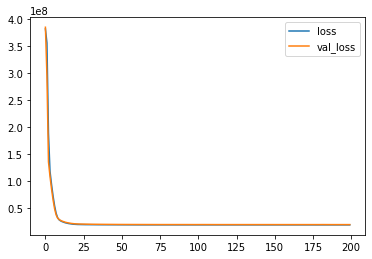

In [231]:
loss.plot()

In [234]:
predictArray = model.predict(X_test)
# mean_absolute_error(y_test, predictArray)

In [233]:
r2_score(y_test, predictArray)

0.7988190745605324

In [0]:
sklearn.metrics.mean_absolute_percentage_error